In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def get_latest_output_dir(reward, strategy, policy_cls, index=-1):
    output_dir = sorted(glob.glob(f"../records/{reward}/{strategy}/{policy_cls}/*"))[index]
    return output_dir


def plot_metrics(reward, strategy, policy_cls, scale=1, ann_scaler=252, norm_steps_per_episode=False, index=-1):
    
    output_dir = get_latest_output_dir(reward, strategy, policy_cls, index)
    
    df_base = pd.read_csv(f"{output_dir}/baseline/result.csv")
    df_train = pd.read_csv(f"{output_dir}/metrics/train_result.csv", index_col=0)
    df_valid = pd.read_csv(f"{output_dir}/metrics/validation_result.csv", index_col=0)
    df_base = df_base.loc[df_base.index.repeat(len(df_train))].reset_index(drop=True)

    df_train["reward"] = df_train["reward"] / scale * ann_scaler
    
    if norm_steps_per_episode:
        df_train["reward"] = df_train["reward"] / df_train["steps_per_episode"]
    
    df = pd.DataFrame({
        "baseline": df_base["reward"],
        "train": df_train["reward"],
        "valid": df_valid["val/reward"]
    })
    
    print(f"Loaded metrics from: {output_dir}")
    best = df.fillna(-1).sort_values("valid", ascending=True).iloc[-1].to_dict()
    print(best)
    print(df)
    
    df.plot(figsize=(10, 6))
    plt.legend([f"baseline ({best['baseline']:.5f})", f"train ({best['train']:.5f})", f"valid ({best['valid']:.5f})"])
    plt.title(f"{strategy} ({policy_cls})")
    plt.xlabel("Episode")
    plt.ylabel(reward)

Loaded metrics from: ../records/EpisodeInformationRatioReward/TopkDropoutDynamicStrategy/MetaPPO/2023_03_18_07_32
{'baseline': 1.6462685298414856, 'train': 2.146652057833966, 'valid': 1.6665577271577303}
    baseline     train     valid
0   1.646269  2.433298  0.247934
1   1.646269  3.095613  0.604184
2   1.646269  2.742762  0.262363
3   1.646269  2.567560  0.112560
4   1.646269  2.720561  1.448662
5   1.646269  2.298556  1.473985
6   1.646269  2.796990  0.578361
7   1.646269  2.243513  1.237077
8   1.646269  2.146652  1.666558
9   1.646269  2.907500  1.232655
10  1.646269  3.176898  1.152092
11  1.646269  2.597187  1.261361
12  1.646269  3.279929  1.158344
13  1.646269  3.248982  0.744111
14  1.646269  2.228652  1.236686
15  1.646269  1.955115  0.866358
16  1.646269  2.112552  0.461766
17  1.646269  2.660951  0.393103
18  1.646269  2.537847  0.534620
19  1.646269  3.484487  0.256759
20  1.646269  3.084081  0.814887
21  1.646269  3.073529  0.879496


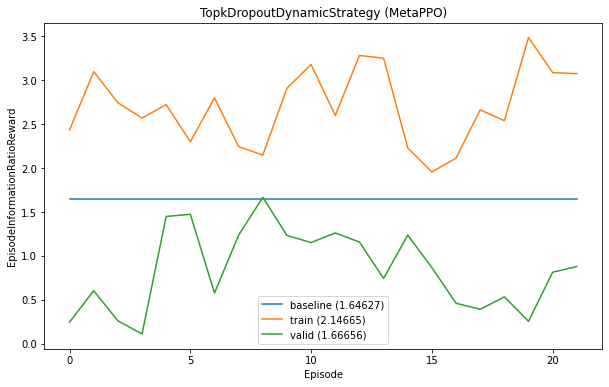

In [3]:
plot_metrics(
    reward="EpisodeInformationRatioReward",
    strategy="TopkDropoutDynamicStrategy",
    policy_cls="MetaPPO",
    scale=1,
    ann_scaler=1,
    norm_steps_per_episode=False
)